# Python数据可视化实例

本文将通过一些Python数据可视化实例，展示Python强大的数据可视化能力

- [图形设置](#plotsetting)
- [示例数据](#sample_data)
- [常用数据可视化图形绘制](#common_plot)
    - [条形图](#bar)
    - [饼图](#pier)
    - [散点图](#scatter)
    - [气泡图](#bubble)
    - [箱形图](#boxplot)
    - [小提琴图](#violin)
    - [折线图](#line)
    - [密度图](#density)
    - [直方图](#hist)
    - [误差棒图](#errorbar)
    - [雷达图](#radar)
    - [热力图](#heatmap)
- [复杂数据可视化图形绘制](#complex_plot)
    - [给图形增加注解](#add_annotate)
    - [分面](#facet)
    - [配对分面](#pair_facet)
    - [图形组合](#combine_plot)
    - [散点回归图](#lm)
    - [在散点图两侧增加直方图](#scatter_hist)
    - [3D图形](#3d_plot)
    - [加入地图背景](#map)
    - [通过PCA可视化数据](#pca)
    - [词云图](#wordcloud)

---
<a name='plotsetting'/>

## 图形设置

绘制图形前，先设置图形的一些参数，这样可以避免重复设置诸如图形风格、标题大小等图形参数

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import _rebuild
import seaborn as sns

# 设置全局的图形参数
sns.set_style(
    # 图形风格
    "whitegrid", 
    # 网格默认不显示
    {'axes.grid' : False})

sns.set_context(rc={
    # 标题大小
    'axes.titlesize': 25,
    # 轴的上标题大小
    'axes.labelsize': 20,
    # x轴刻度文字大小
    'xtick.labelsize': 15, 
    # y轴刻度文字大小
    'ytick.labelsize': 15})

# 设置中文显示
# 不同系统的设置方式可能会有所不同！
_rebuild()
matplotlib.rcParams['font.family']=['FangSong']
matplotlib.rcParams['axes.unicode_minus'] = False

---
<a name='sample_data'/>

## 示例数据

本文采用的示例数据是2016-2017赛季NBA的数据

- 球员数据  
球员数据主要包括了球员ID，球员名字等数据，其中，avg_pts到avg_play_time分别表示球员的场均得分、助攻、进攻篮板、防守篮板、抢断、盖帽、失误、命中球数、出手次数、三分命中数、上场时间；position表示球员在场上位置，1.5表示该球员可以打1号位或者2号位。简单的将进攻篮板和防守篮板相加，作为篮板数据(`avg_reb`)

In [2]:
players = pd.read_csv('data/nba_players.csv')
players['avg_reb'] = players['avg_oreb'] + players['avg_dreb']
print(players.shape)
players.head()

(446, 16)


,player_id,player_name,avg_pts,avg_ast,avg_oreb,avg_dreb,avg_stl,avg_blk,avg_tov,avg_fgm,avg_fga,avg_tpm,avg_play_time,team_name,position,avg_reb
0,1,凯尔-科沃尔,10.12,1.64,0.13,2.66,0.49,0.31,1.03,3.57,7.66,2.42,26.13,骑士,2.5,2.79
1,2,蒂亚戈-斯普利特,4.33,0.44,0.89,1.56,0.11,0.11,0.67,1.56,3.44,0.22,8.56,76人,5.0,2.45
2,3,保罗-米尔萨普,17.87,3.63,1.59,6.13,1.30,0.87,2.29,6.17,13.94,1.09,33.66,老鹰,4.0,7.72
3,4,萨博-塞福洛沙,7.16,1.73,0.84,3.52,1.48,0.50,0.95,2.81,6.35,0.66,25.73,老鹰,2.5,4.36
4,5,杰夫-蒂格,15.29,7.78,0.39,3.66,1.24,0.39,2.63,4.90,11.07,1.10,32.44,步行者,1.0,4.05


- 库里每场比赛数据  
记录了库里每场比赛的详细数据

In [3]:
currey_performance = pd.read_csv('data/nba_curry_performance.csv', parse_dates=['game_date'])
currey_performance.head()

,game_date,pts,ast,oreb,dreb,stl,blk,tov,fgm,fga,tpm
0,2016-10-26,26,4,0,3,0,0,4,9,18,3
1,2016-10-29,23,7,1,0,1,0,4,8,19,4
2,2016-10-31,28,3,0,1,0,0,1,9,17,5
3,2016-11-02,28,3,1,3,1,0,4,10,21,5
4,2016-11-04,21,7,0,1,2,1,1,6,14,2


- 球队地理信息

`lon`和`lat`表示球队的经纬度，由于洛杉矶湖人与快船同在一个城市，因此坐标稍作了一些修改。

In [4]:
team_info = pd.read_csv('data/nba_team.csv')
team_info.head()

,team_id,team_name,division,lon,lat
0,1,老鹰,东部,-84.392152,33.756893
1,2,凯尔特人,东部,-71.062212,42.366205
2,3,鹈鹕,西部,-90.071530,29.951070
3,4,公牛,东部,-87.674176,41.880691
4,5,黄蜂,东部,-80.839344,35.225137


由于不同数据可视化图形需要不同格式，类型的数据，因此在绘制过程中，会使用`pandas`对数据进行更多的处理，以便图形的绘制

- 勇士对每场球员数据

记录了勇士球员每场比赛的详细数据

In [5]:
gs_player_performance = pd.read_csv('data/gs_player_performance.csv', parse_dates=['game_date'])
gs_player_performance.head()

,Unnamed: 0,player_name,game_date,pts,ast,oreb,dreb,stl,blk,tov,fgm,fga,tpm
0,0,肖恩-利文斯顿,2016-02-23,4,1,0,1,0,2,2,2,2,0
1,1,肖恩-利文斯顿,2016-03-02,6,3,2,4,2,0,0,3,9,0
2,2,肖恩-利文斯顿,2015-12-12,12,3,3,0,0,2,1,5,9,0
3,3,肖恩-利文斯顿,2016-04-02,8,2,0,2,0,1,3,3,4,0
4,4,肖恩-利文斯顿,2015-10-28,6,2,0,4,0,1,0,3,6,0


---
<a name='common_plot'/>

## 常用数据可视化图形绘制

<a name='bar'/>

### 条形图

- 各个位置上球员数量分布

绘制基础的条形图

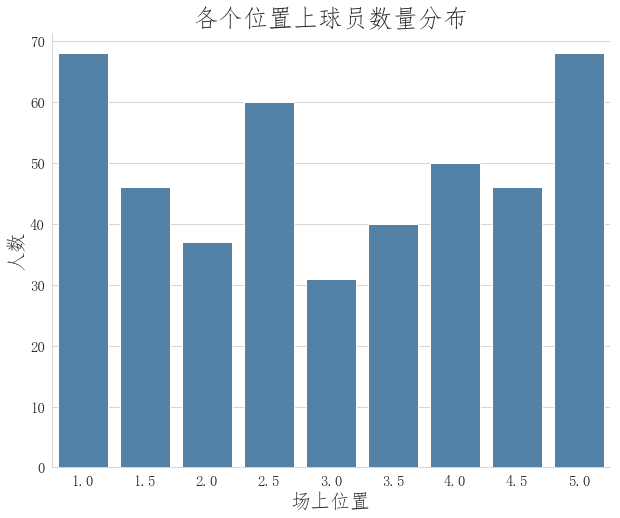

In [6]:
# 计算各个位置上球员数量
player_position_num = players.groupby('position')['player_id'].agg({'count'}).reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='position',  y='count', data=player_position_num,
            color='steelblue')
# 去掉上边和右边边框
sns.despine()
plt.grid(axis='y')
plt.xlabel('场上位置')
plt.ylabel('人数')
plt.title('各个位置上球员数量分布')
plt.show()

- 勇士队球员场均得分

绘制横向的条形图

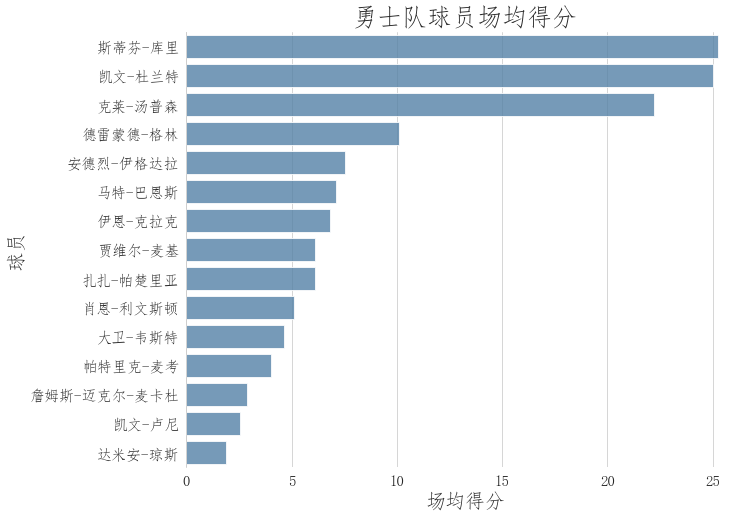

In [7]:
# 取出勇士球员数据
gs_players = players[players['team_name'] == '勇士']
# 按得分排序
gs_players = gs_players.sort_values('avg_pts', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='avg_pts', y='player_name', data=gs_players, 
            color='steelblue', alpha=0.8)
# 同时去掉底部边框
sns.despine(bottom=True)
plt.grid(axis='x')
plt.xlabel('场均得分')
plt.ylabel('球员')
plt.title('勇士队球员场均得分')
plt.show()

- 五支球队各项数据比较

分组条形图是可视化数据对比的常用方法

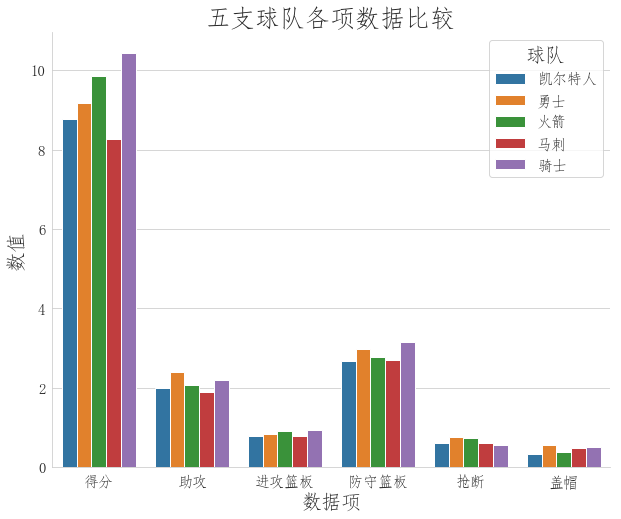

In [8]:
# 取出五支队伍球员的数据
sub_team_players = players[players['team_name'].isin(['勇士', '火箭', '骑士', '凯尔特人', '马刺'])]
# 计算五支队伍的人均数据
sub_team_players_stats = sub_team_players.groupby('team_name')\
    .agg({'avg_pts': 'mean', 'avg_ast': 'mean', 
          'avg_oreb': 'mean', 'avg_dreb': 'mean', 
          'avg_stl': 'mean', 'avg_blk': 'mean'}).reset_index()
# 将宽数据转为长数据方便作图
sub_team_players_stats = sub_team_players_stats.melt(id_vars='team_name')
sub_team_players_stats.replace({'variable': {'avg_pts': '得分', 'avg_ast': '助攻', 
                                             'avg_oreb': '进攻篮板', 'avg_dreb': '防守篮板', 
                                             'avg_stl': '抢断', 'avg_blk': '盖帽'}}, inplace=True)

fig = plt.figure(figsize=(10, 8))
ax = fig.subplots()
sns.barplot(x='variable', y='value', hue='team_name', data=sub_team_players_stats)
sns.despine()
# 设置图例
lgd = ax.legend(loc='upper right', fancybox=True, prop={'size': 15}, title='球队')
plt.setp(lgd.get_title(),fontsize=20)
plt.grid(axis='y')
plt.xlabel('数据项')
plt.ylabel('数值')
plt.title('五支球队各项数据比较')
plt.show()

- 两支队伍数据对比

堆叠条形图可以增强对比度

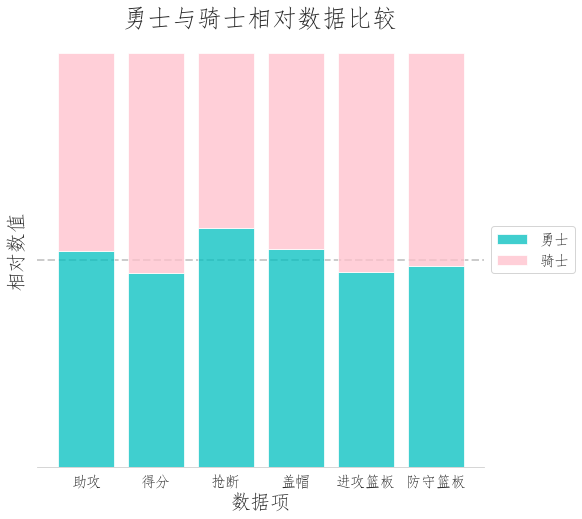

In [9]:
gs_cle_stats = sub_team_players_stats[sub_team_players_stats['team_name'].isin(['勇士', '骑士'])].copy()
# 按数据项分组，计算数值的占比
gs_cle_stats['relative_value'] = gs_cle_stats.groupby(['variable'])['value']\
    .transform(lambda x: x / np.sum(x))
gs_stats = gs_cle_stats[gs_cle_stats['team_name'] == '勇士']
cle_stats = gs_cle_stats[gs_cle_stats['team_name'] == '骑士']

plt.figure(figsize=(8, 8))
plt.bar(gs_stats['variable'], gs_stats['relative_value'], 
        color='c', alpha=0.75, label='勇士')
plt.bar(cle_stats['variable'], cle_stats['relative_value'], 
        bottom=gs_stats['relative_value'], color='pink', alpha=0.75, label='骑士')
sns.despine(left=True)
# 设置grid，只显示y=0.5的的网格线
plt.grid(axis='y', linewidth=2, linestyle='--')
plt.yticks([0.5], ())
plt.legend(loc='center left', fancybox=True, bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.xlabel('数据项')
plt.ylabel('相对数值')
plt.title('勇士与骑士相对数据比较')
plt.show()

- 库里能力指数

在条形图中，将最大值设置为条形的背景，增强可视化效果

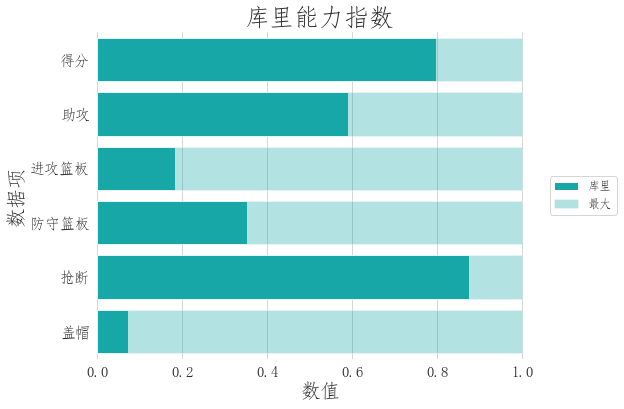

In [10]:
# 计算球员指数，这里简单的将球员的数值进行正规化，即(x - max(x)) / (max(x) - min(x))
player_index = players[['avg_pts', 'avg_ast', 'avg_oreb', 'avg_dreb', 'avg_stl', 'avg_blk']]\
    .apply(lambda x: (x - min(x)) / (max(x) - min(x)))
player_index['player_name'] = players['player_name']

curry_index = player_index[player_index['player_name'] == '斯蒂芬-库里']
curry_index = curry_index.loc[:, 'avg_pts':'avg_blk'].melt()
curry_index.replace({'variable': {'avg_pts': '得分', 'avg_ast': '助攻', 
                                  'avg_oreb': '进攻篮板', 'avg_dreb': '防守篮板', 
                                  'avg_stl': '抢断', 'avg_blk': '盖帽'}}, inplace=True)
# 构建一个最大值的数据
max_index = pd.concat([curry_index['variable'], pd.Series(np.repeat(1, 6), name='value')], axis=1)

plt.figure(figsize=(8, 6))
sns.barplot(x='value', y='variable', data=curry_index,
            label='库里', color='c')
# 将数据项最大值最为“背景”
sns.barplot(x='value', y='variable', data=max_index,
            label='最大', color='c', alpha=0.33)
sns.despine(left=True, bottom=True)
plt.grid(axis='x')
plt.xlabel('数值')
plt.ylabel('数据项')
plt.title('库里能力指数')
plt.legend(loc='center left', fancybox=True, bbox_to_anchor=(1, 0.5), prop={'size': 12})
plt.show()

---
<a name='pie'></a>

### 饼图

- 球员得分区间分布

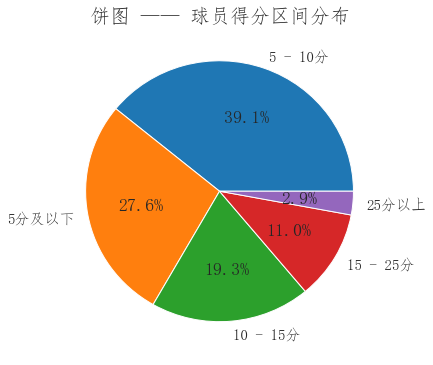

In [11]:
# 将球员得分进行封箱操作
avg_pts_cuts = pd.cut(players['avg_pts'], bins=[0, 5, 10, 15, 25, 100], 
                      labels=['5分及以下', '5 - 10分', '10 - 15分', '15 - 25分', '25分以上'])
avg_pts_cuts_stats = avg_pts_cuts.value_counts()

plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(avg_pts_cuts_stats, labels=avg_pts_cuts_stats.index, 
                                    autopct='%1.1f%%')
# 调整饼图中的文字大小
plt.setp(autotexts, size=18)
plt.setp(texts, size=15)
plt.title('饼图 —— 球员得分区间分布', size=20)
plt.show()

---
<a name='scatter'></a>

### 散点图

- 场均上场时间与场均得分

绘制基础散点图

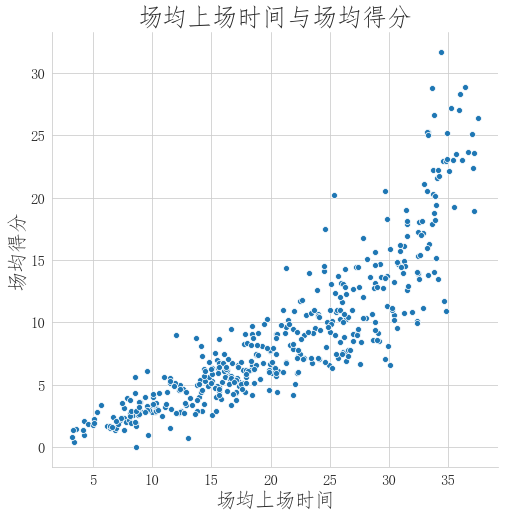

In [12]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='avg_play_time', y='avg_pts', data=players)
sns.despine()
plt.grid()
plt.xlabel('场均上场时间')
plt.ylabel('场均得分')
plt.title('场均上场时间与场均得分')
plt.show()

- 得分、助攻、位置与上场时间

通过大小、颜色、形状等图形属性可以可视化不同维度的数据分布情况

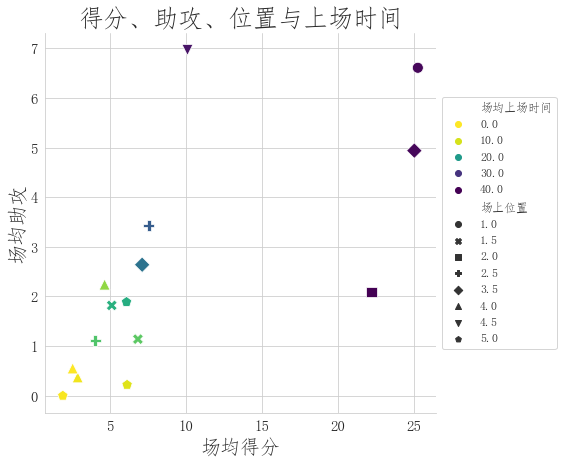

In [13]:
fig = plt.figure(figsize=(7, 7))
ax = fig.subplots()
sns.scatterplot(x='avg_pts', y='avg_ast', hue='avg_play_time', style='position',
                data=gs_players, palette='viridis_r', s=120)
sns.despine()
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, prop={'size': 12})
# 设置图例名称
lgd.texts[0].set_text('场均上场时间')
lgd.texts[-9].set_text('场上位置')
plt.grid()
plt.xlabel('场均得分')
plt.ylabel('场均助攻')
plt.title('得分、助攻、位置与上场时间')
plt.show()

---
<a name='bubble'></a>

### 气泡图

- 各球队在每个位置上的球员数量(以大小表示)

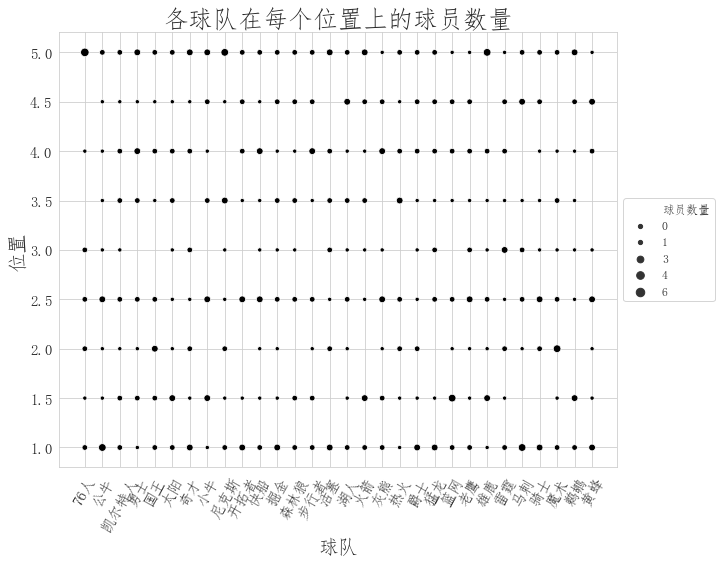

In [14]:
# 计算每支球队各个位置上球员数量
players_tp_num = players.groupby(['team_name', 'position'])\
    .agg({'player_id': 'size'})\
    .reset_index().rename(columns={'player_id': 'player_num'})

fig = plt.figure(figsize=(10, 8))
ax = fig.subplots()
sns.scatterplot(x='team_name', y='position', size='player_num', color='k',
                data=players_tp_num, ax=ax)
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, prop={'size': 12})
lgd.texts[0].set_text('球员数量')
plt.grid()
plt.xlabel('球队')
plt.ylabel('位置')
plt.xticks(rotation=60)
plt.title('各球队在每个位置上的球员数量')
plt.show()

- 各球队在每个位置上的球员数量(以颜色表示)

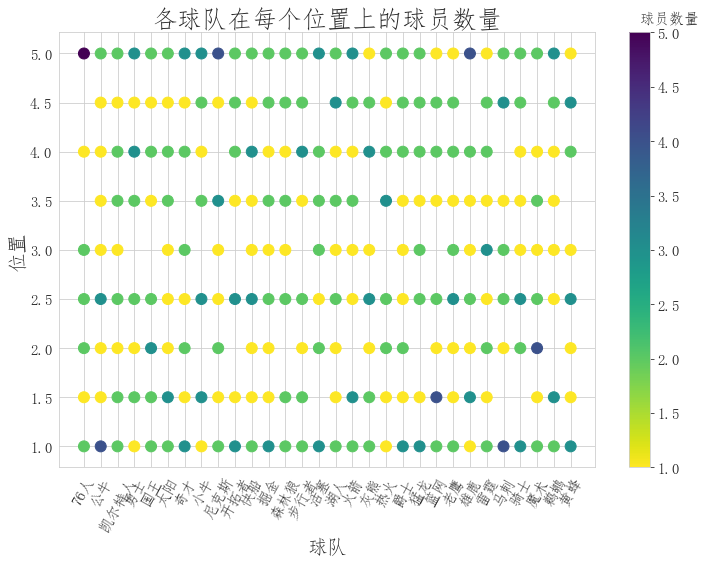

In [15]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x='team_name', y='position', c='player_num', s=120, 
            data=players_tp_num, cmap='viridis_r')
# 设置colorbar标题
clb = plt.colorbar()
clb.set_label('球员数量', labelpad=-10, y=1.05, rotation=0, fontsize=15)
plt.grid()
plt.xlabel('球队')
plt.ylabel('位置')
plt.xticks(rotation=60)
plt.title('各球队在每个位置上的球员数量')
plt.show()

---
<a name='boxplot'></a>

### 箱形图

- 各支球队的球员场均得分分布  
通过箱形图方便地观察球员得分分布情况，特别是数据中的几个关键统计量，如中位数等

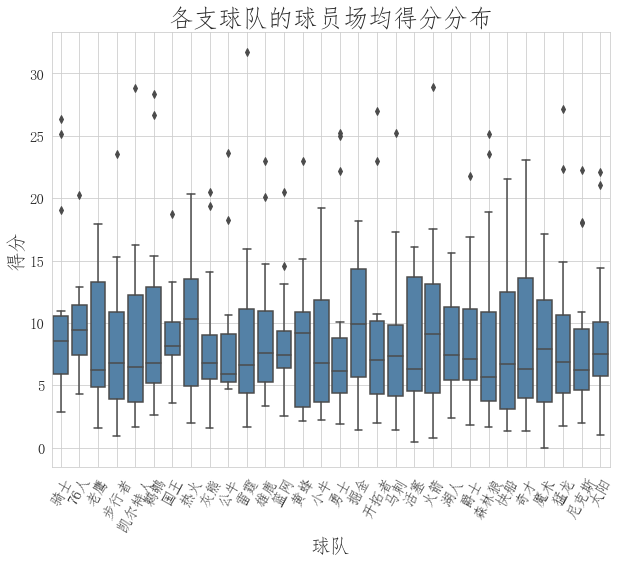

In [16]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='team_name', y='avg_pts', data=players, color='steelblue')
plt.grid()
plt.xlabel('球队')
plt.ylabel('得分')
plt.xticks(rotation=60)
plt.title('各支球队的球员场均得分分布')
plt.show()

---
<a name='violin'></a>

### 小提琴图

- 五支球队的球员场均得分分布  
小提琴图与箱形图有相似，但是能更清晰的看到整个数据的分布情况

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


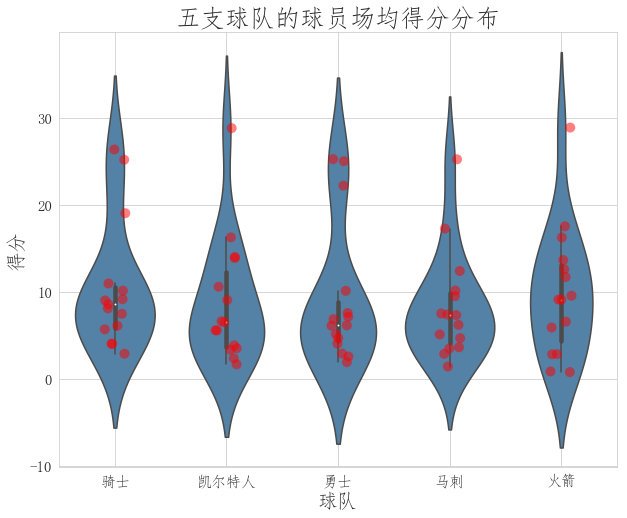

In [17]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='team_name', y='avg_pts', data=sub_team_players, color='steelblue')
# 加入经过抖动处理的数据点
sns.stripplot(x='team_name', y='avg_pts', data=sub_team_players, jitter=True, 
              color='r', s=10, alpha=0.5)
plt.grid()
plt.xlabel('球队')
plt.ylabel('得分')
plt.title('五支球队的球员场均得分分布')
plt.show()

---
<a name='line'></a>

### 折线图

- 库里比赛得分趋势

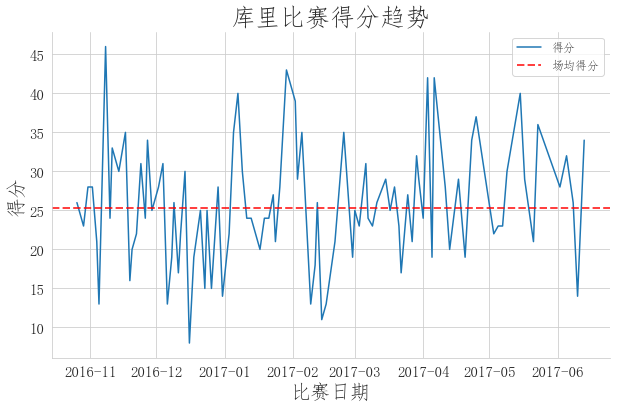

In [18]:
# 库里赛季场均得分
avg_pts = players[players['player_name'] == '斯蒂芬-库里']['avg_pts'].iloc[0]

plt.figure(figsize=(10, 6))
sns.lineplot('game_date', 'pts', data=currey_performance, label='得分')
plt.axhline(avg_pts, linestyle='--', color='r', alpha=0.75, 
            linewidth=2, label='场均得分')
sns.despine()
plt.grid()
plt.legend(fancybox=True, prop={'size': 12})
plt.xlabel('比赛日期')
plt.ylabel('得分')
plt.title('库里比赛得分趋势')
plt.show()

---
<a name='density'/>

### 密度图

- 得分密度图

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


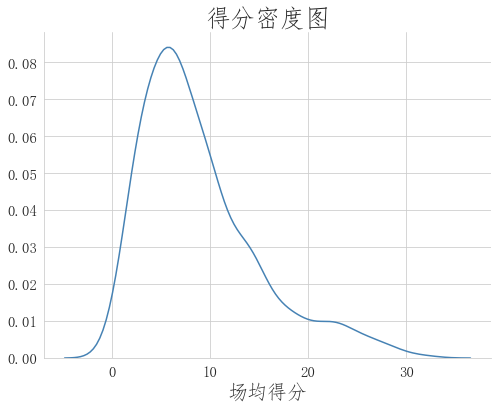

In [19]:
plt.figure(figsize=(8, 6))
sns.distplot(players['avg_pts'], color='steelblue', hist=False)
sns.despine()
plt.grid()
plt.xlabel('场均得分')
plt.title('得分密度图')
plt.show()

---
<a name='hist'/>

### 直方图

- 助攻直方图

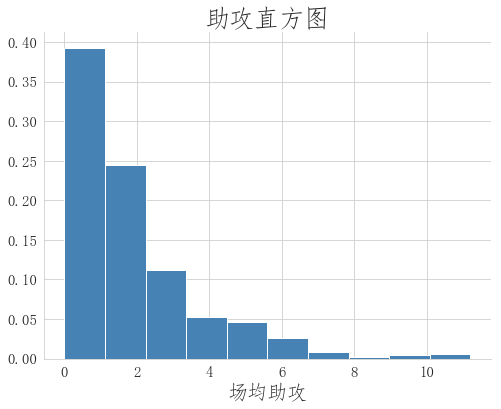

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(players['avg_ast'], color='steelblue', density=True)
sns.despine()
plt.grid()
plt.xlabel('场均助攻')
plt.title('助攻直方图')
plt.show()

---
<a name='errorbar'>

### 误差棒图

- 每场比赛出手次数

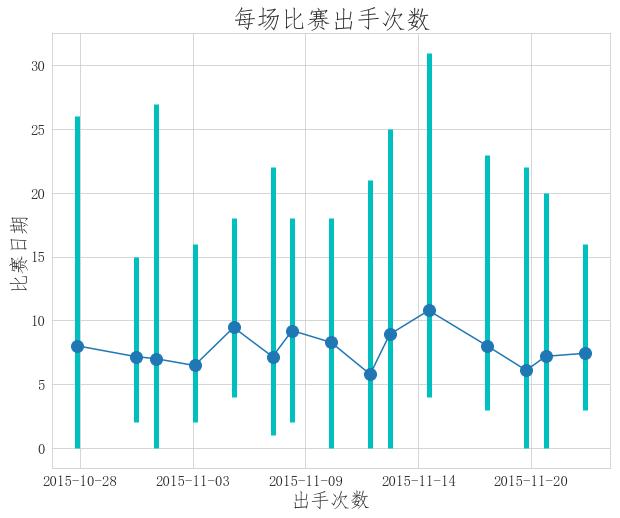

In [21]:
import datetime

# 计算每场比赛平均、最大、最小出手次数
gs_player_summary = gs_player_performance.groupby('game_date')\
    .agg({'fga': ['mean', 'min', 'max']})[:15].reset_index()
gs_player_summary.columns = ['game_date', 'mean', 'min', 'max']
# 计算上下界
gs_player_summary['low'] = gs_player_summary['mean'] - gs_player_summary['min']
gs_player_summary['high'] = gs_player_summary['max'] - gs_player_summary['mean']

# 将时间数据转为整数类型
dates = gs_player_summary['game_date'].values.tolist()
fig, ax = plt.subplots(figsize=(10, 8))
ax.errorbar(dates, gs_player_summary['mean'], 
            # 上下界
            yerr=[gs_player_summary['low'], gs_player_summary['high']], 
            fmt='-o', elinewidth=5, ecolor='c', markersize=12)
# 设置时间轴
ax.set_xticklabels([datetime.datetime.fromtimestamp(ts / 1e9).strftime('%Y-%m-%d') for ts in ax.get_xticks()])
plt.grid()
plt.xlabel('出手次数')
plt.ylabel('比赛日期')
plt.title('每场比赛出手次数')
plt.show()

---
<a name='radar'/>

### 雷达图

- 凯文-杜兰特能力指数

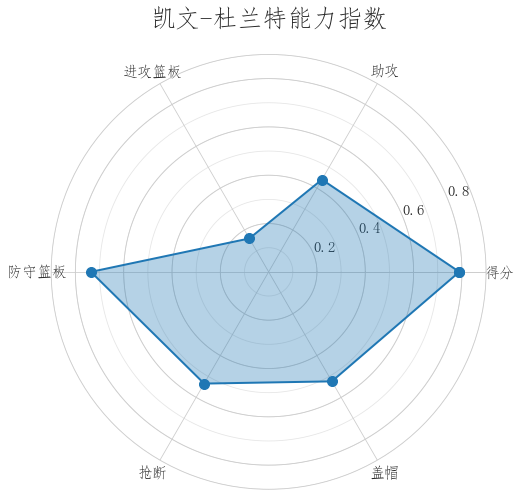

In [22]:
# 计算球员指数，这里简单的将球员的数值进行正规化，即(x - max(x)) / (max(x) - min(x))
player_index = players[['avg_pts', 'avg_ast', 'avg_oreb', 'avg_dreb', 'avg_stl', 'avg_blk']]\
    .apply(lambda x: (x - min(x)) / (max(x) - min(x)))
player_index['player_name'] = players['player_name']
labels = ['得分', '助攻', '进攻篮板', '防守篮板', '抢断', '盖帽']

kd_index = player_index[player_index['player_name'] == '凯文-杜兰特']
values = kd_index.values[0][:-1]

fig = plt.figure(figsize=(8, 8))
# 坐标系设置为极坐标系
ax = fig.add_subplot(111, polar=True)
# 设置角度
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
values = np.concatenate((values, [values[0]]))
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, values, 'o-', linewidth=2, markersize=10)
ax.fill(angles, values, alpha=0.33)
ax.set_thetagrids(angles * 180 / np.pi, labels)
# 设置y的ticks
ax.set_yticks(np.arange(0.2, 1, 0.2))
ax.set_yticks(np.arange(0.1, 1, 0.1), minor=True)
ax.grid(which='minor', alpha=0.5)
ax.set_title('凯文-杜兰特能力指数')
plt.show()

- 球员能力指数比较

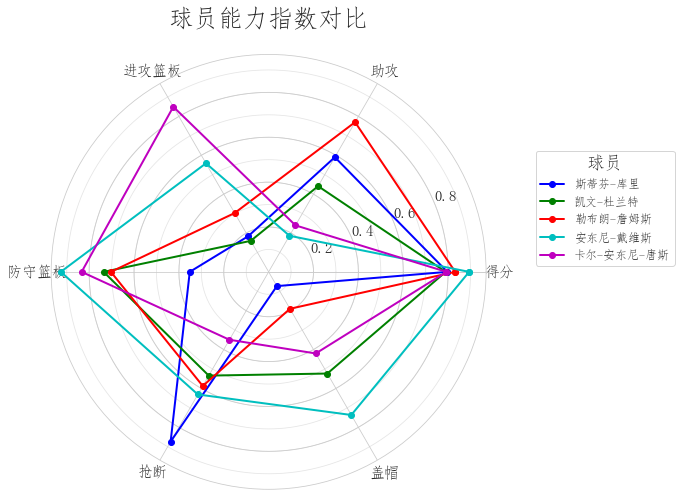

In [23]:
#  设置查看球员与他们显示的颜色
inspect_players = [('斯蒂芬-库里', 'b'), ('凯文-杜兰特', 'g'), 
                   ('勒布朗-詹姆斯', 'r'), ('安东尼-戴维斯', 'c'), 
                   ('卡尔-安东尼-唐斯', 'm')]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
for name, clr in inspect_players:
    index_data = player_index[player_index['player_name'] == name]
    values = index_data.values[0][:-1]
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
    values = np.concatenate((values, [values[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    ax.plot(angles, values, 'o-', color=clr, linewidth=2, label=name)
ax.set_thetagrids(angles * 180 / np.pi, labels)
ax.set_yticks(np.arange(0.2, 1, 0.2))
ax.set_yticks(np.arange(0.1, 1, 0.1), minor=True)
ax.grid(which='minor', alpha=0.5)
ax.set_title('球员能力指数对比')
lgd = ax.legend(loc='lower left', bbox_to_anchor=(1.1, 0.5), title='球员', 
                fancybox=True, prop={'size': 12}, fontsize=20)
plt.setp(lgd.get_title(),fontsize=18)
plt.show()

---
<a name='heatmap'/>

### 热力图

- 各项数据相关矩阵

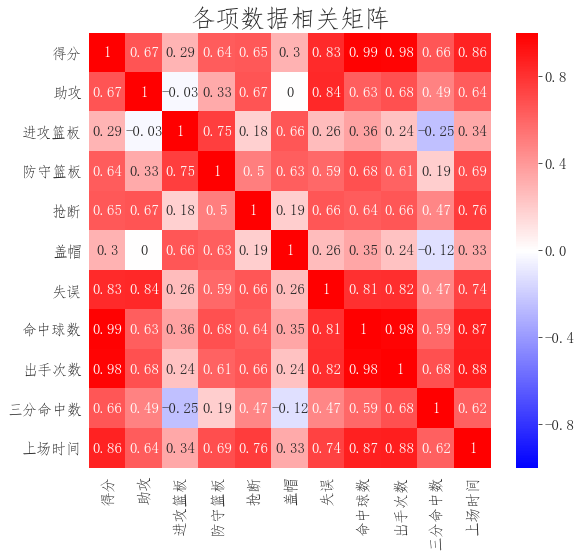

In [24]:
item_data = players.loc[:, 'avg_pts':'avg_play_time']
item_data.columns = ['得分', '助攻', '进攻篮板', '防守篮板', '抢断', '盖帽', '失误', '命中球数', 
                     '出手次数', '三分命中数', '上场时间']
# 计算相关性矩阵
corr_matrix = np.round(item_data.corr(), 2)

plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='bwr', annot=True, annot_kws={'size': 15})
plt.title('各项数据相关矩阵')
plt.show()

---
<a name='complex_plot'/>

## 复杂数据可视化图形绘制

<a name='add_annotate'/>

### 给图形增加注解

对图形中一些重要的部分增加注解和说明对于数据可视化是非常有帮助的

- 得分与篮板

给斯蒂芬-库里、德怀特-霍华德和安东尼-戴维斯三位球员增加注解

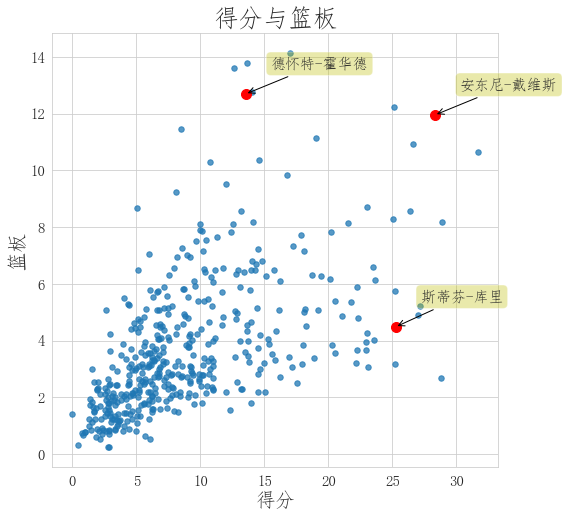

In [25]:
annotate_player = players[players['player_name'].isin(['斯蒂芬-库里', '德怀特-霍华德', '安东尼-戴维斯'])]

plt.figure(figsize=(8, 8))
plt.scatter('avg_pts', 'avg_reb', data=players, s=30, alpha=0.75)
for row in annotate_player.iterrows():
    # 将需要注解的点增加大小并改为红色
    plt.scatter(row[1]['avg_pts'], row[1]['avg_reb'], s=100, c='r')
    # 增加注解
    plt.annotate(row[1]['player_name'], xy=[row[1]['avg_pts'], row[1]['avg_reb']], 
                 xytext = [25, 25], textcoords='offset points', size=15,
                 # 设置文字框属性
                 bbox={'boxstyle': 'round,pad=0.3', 'fc': 'y', 'alpha': 0.33},
                 # 设置箭头属性
                 arrowprops={'arrowstyle': '->', 'color': 'k'})
plt.grid()
plt.xlabel('得分')
plt.ylabel('篮板')
plt.title('得分与篮板')
plt.show()

---
<a name='facet'/>

### 分面

分面是将数据分组后，可视化各个组别中的数据，是一种常用的数据可视化方法

- 按队伍进行分面

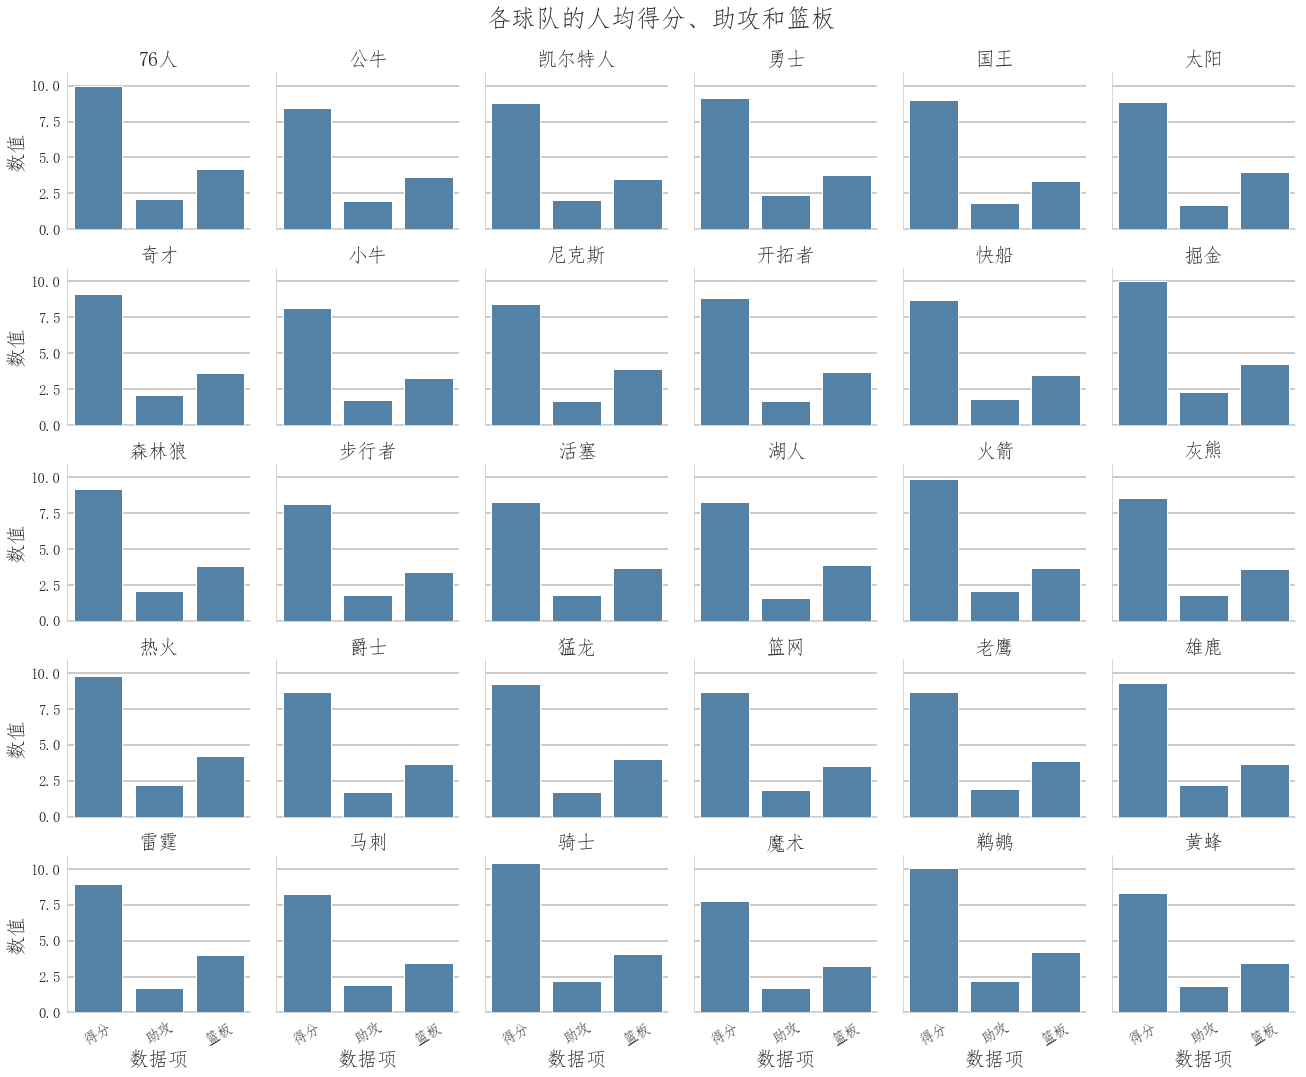

In [26]:
# 按球队进行统计
team_stats = players.groupby('team_name')\
    .agg({'avg_pts': 'mean', 'avg_ast': 'mean', 'avg_reb': 'mean'}).reset_index()
team_stats = team_stats.melt(id_vars='team_name')
team_stats = team_stats.replace({'variable': {'avg_pts': '得分', 'avg_ast': '助攻', 'avg_reb': '篮板'}})

# 自定义一个画图函数
def plot_barplot(*args, **kwargs):
    df = pd.concat([args[0], args[1]], axis=1)
    ax = sns.barplot(df.columns[0], df.columns[1], data=df, color='steelblue')
    sns.despine()
    ax.grid(axis='y', linewidth=2)

# 创建分面
g = sns.FacetGrid(team_stats, col='team_name', col_wrap=6, margin_titles=True)
g.map(plot_barplot, 'variable', 'value')
g.set_axis_labels('数据项', '数值')
g.set_xticklabels(rotation=30)
g.set_titles(col_template = '{col_name}')
# 调整图片的标题位置
plt.subplots_adjust(top=0.92)
fig = plt.gcf()
fig.suptitle('各球队的人均得分、助攻和篮板', fontsize=25)
plt.show()

- 按数据项进行分面

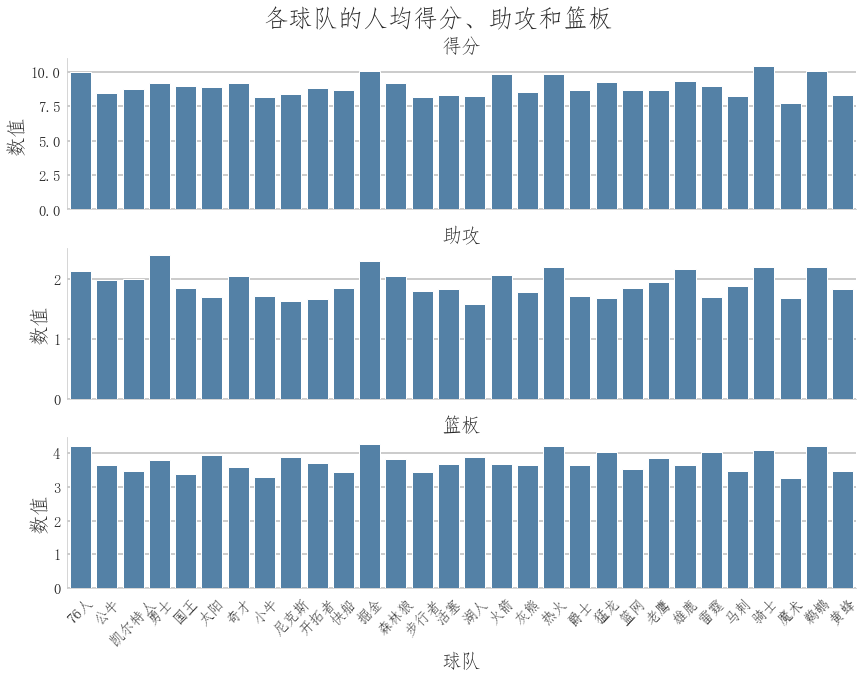

In [27]:
g = sns.FacetGrid(team_stats, col='variable', sharey=False, aspect=4, 
                  height=3, col_wrap=1, margin_titles=True)
g.map(plot_barplot, 'team_name', 'value')
g.set_axis_labels('球队', '数值')
g.set_xticklabels(rotation=45)
g.set_titles(col_template = '{col_name}')
plt.subplots_adjust(top=0.9)
fig = plt.gcf()
fig.suptitle('各球队的人均得分、助攻和篮板', fontsize=25)
plt.show()

---
<a name='pair_facet'/>

### 配对分面

配对分面是分面的一种延伸，每个`面`可以将2个变量的相关性等可视化出来，方便查看

- 各项数据相关性

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


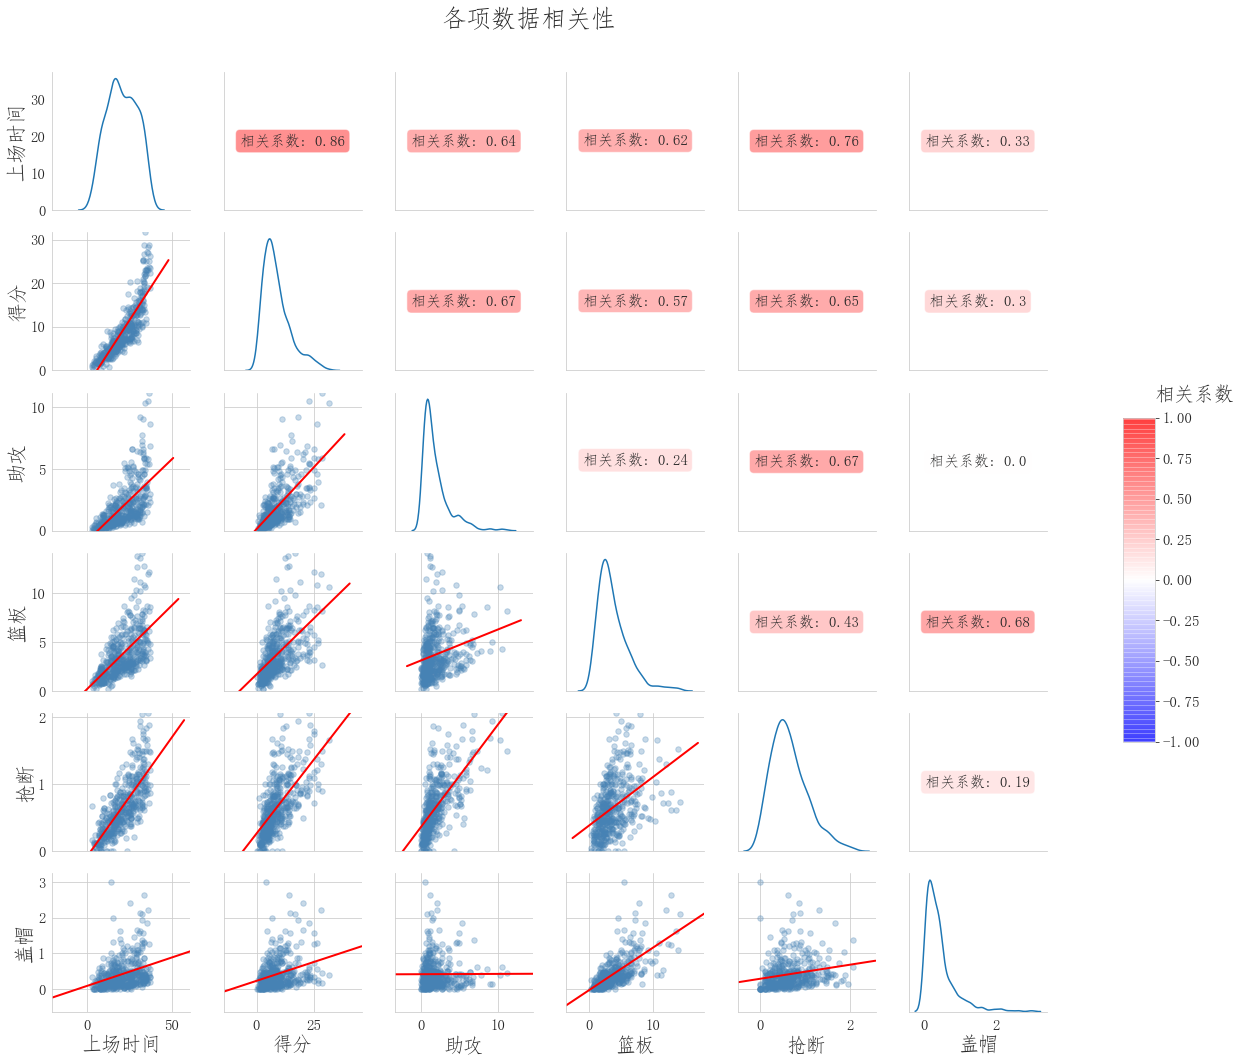

In [28]:
from scipy.stats import pearsonr

# 计算相关系数
def cal_correlate(s1, s2):
    return round(pearsonr(s1, s2)[0], 2)

item_data = players.loc[:, ['avg_play_time', 'avg_pts', 'avg_ast', 'avg_reb', 'avg_stl', 'avg_blk']]
item_data.columns = ['上场时间', '得分', '助攻', '篮板', '抢断', '盖帽']

# 自定义回归图
def customize_replot(*args, **kwargs):
    df = pd.concat([args[0], args[1]], axis=1)
    ax = sns.regplot(df.columns[0], df.columns[1], data=df, ci=None,
                     line_kws={'color': 'r', 'linewidth': 2},
                     scatter_kws={'s': 30, 'alpha': 0.3, 'color': 'steelblue'})
    ax.grid()
    
# 自定义显示相关系数
def customize_correlate(*args, **kwargs):
    corr = cal_correlate(args[0], args[1])
    max_x, min_x = np.max(args[0]), np.min(args[0])
    max_y, min_y = np.max(args[1]), np.min(args[0])
    text_x = (max_x + min_x) / 2
    text_y = (max_y + min_y ) /2
    
    cm = matplotlib.cm.bwr
    # 将相关系数缩放到0-1范围内，获取相应的颜色
    rescale = (float(corr) + 1) / 2
    clr = cm(rescale)
    
    plt.text(text_x, text_y, '相关系数: {}'.format(corr), fontsize=15, 
             ha='center', va='center',
             bbox={'boxstyle': 'round,pad=0.3', 'fc': clr, 'alpha': 0.5})
    plt.ylim(min_y, max_y)

p = sns.PairGrid(item_data, diag_sharey=False)
# 绘制上三角中的图
p.map_upper(customize_correlate)
# 绘制对角线上的图
p.map_diag(sns.kdeplot)
# 绘制下三角中的图
p.map_lower(customize_replot)
plt.subplots_adjust(top=0.92)
fig_grid = plt.gcf()
fig_grid.suptitle('各项数据相关性', fontsize=25)

# 增加相关系数图例
# 自定义colorbar
cm = matplotlib.cm.bwr
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
sm = matplotlib.cm.ScalarMappable(norm=norm, cmap=cm)
sm.set_array([-1.0, -0.5, 0, 0.5, 1.0])
# 增加一个轴用于画colorbar
cbaxe = fig_grid.add_axes([1.05, 0.3, 0.03, 0.3])
clb = fig_grid.colorbar(sm, cax=cbaxe, alpha=0.5)
clb.set_label('相关系数', labelpad=-5, y=1.1, rotation=0, fontsize=20)

plt.show()

---
<a name='combine_plot'/>

### 图形组合

通过不同的图形进行组合，可以绘制出更具有可阅读性的图形

- 库里赛季得分趋势

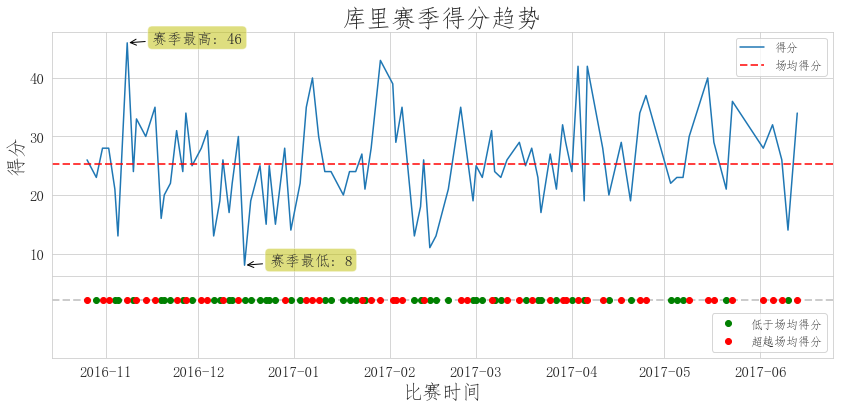

In [29]:
# 库里赛季场均得分
avg_pts = players[players['player_name'] == '斯蒂芬-库里']['avg_pts'].iloc[0]
currey_performance['over_avg'] = np.where(currey_performance['pts'] > avg_pts, 1, 0)
# 赛季最高/最低数据
max_avg_pts = currey_performance.loc[currey_performance['pts'].values.argmax(), :]
min_avg_pts = currey_performance.loc[currey_performance['pts'].values.argmin(), :]

# 绘制上下两个图形
fig, (ax_upper, ax_lower) = plt.subplots(2, 1, figsize=(14, 6), sharex=True,
                                         # 设置上下图形的比列
                                         gridspec_kw = {'height_ratios':[3, 1]})
# 修改图形之间空间，使2个图形毗邻
fig.subplots_adjust(hspace=0)
# 绘制上方图形
ax_upper.plot(currey_performance['game_date'], currey_performance['pts'], label='得分')
ax_upper.axhline(avg_pts, linestyle='--', color='r', alpha=0.75, 
                 linewidth=2, label='场均得分')
# 增加赛季最高/最低注解
for ma_pts, lab in [(max_avg_pts, '赛季最高'), (min_avg_pts, '赛季最低')]:
    ax_upper.annotate(lab + ': {}'.format(ma_pts['pts']), xy=[ma_pts['game_date'], ma_pts['pts']], 
                      xytext = [25, 0], textcoords='offset points', size=15,
                      bbox={'boxstyle': 'round,pad=0.3', 'fc': 'y', 'alpha': 0.5},
                      arrowprops={'arrowstyle': '->', 'color': 'k'})
ax_upper.grid()
ax_upper.legend(fancybox=True, prop={'size': 12})
ax_upper.set_ylabel('得分')
ax_upper.set_title('库里赛季得分趋势')

# 绘制下方图形
for over_avg, clr in enumerate(['g', 'r']):
    mask = currey_performance['over_avg'] == over_avg
    ax_lower.plot_date(currey_performance.loc[mask, 'game_date'], 
                       # 全部画在y=0上
                       np.repeat(0, np.sum(mask)), c=clr, 
                       label='超越场均得分' if over_avg == 1 else '低于场均得分')
ax_lower.grid(axis='x')
ax_lower.grid(axis='y', linewidth=2, linestyle='--')
ax_lower.set_yticks([0])
ax_lower.set_yticklabels(())
ax_lower.set_xlabel('比赛时间')
ax_lower.set_ylim(-1.2, 0.5)
ax_lower.legend(loc = 'lower right', fancybox=True, prop={'size': 12})

plt.show()

---
<a name='lm'/>

### 散点回归图

- 上场时间与得分回归图

画出上场时间与得分的散点图，添加回归线和回归方程

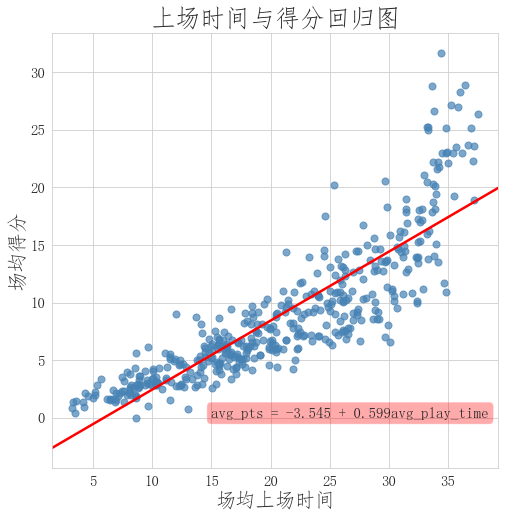

In [30]:
# 求线性回归方程
from scipy.stats import linregress
linear_model = linregress(players['avg_play_time'], players['avg_pts'])
slope = linear_model[0]
intercept = linear_model[1]
linear_formula = 'avg_pts = {} {} {}avg_play_time'.format(round(intercept, 3), 
                                                          '+' if slope > 0 else '-', 
                                                          round(abs(slope), 3))

plt.figure(figsize=(8, 8))
g = sns.regplot('avg_play_time', 'avg_pts', data=players, ci=None,
                # 回归线设置
                line_kws={'color': 'r', 'linewidth': 2.5},
                # 散点图设置
                scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'steelblue'})
plt.grid()
plt.text(15, 0, linear_formula, fontsize=15, 
         bbox={'boxstyle': 'round,pad=0.3', 'fc': 'r', 'alpha': 0.33})
plt.xlabel('场均上场时间')
plt.ylabel('场均得分')
plt.title('上场时间与得分回归图')
plt.show()

---
<a name='scatter_hist'/>

### 在散点图两侧增加直方图

- 得分与助攻

在散点图的上方与右方增加直方图，来观察得分与助攻的分布情况

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


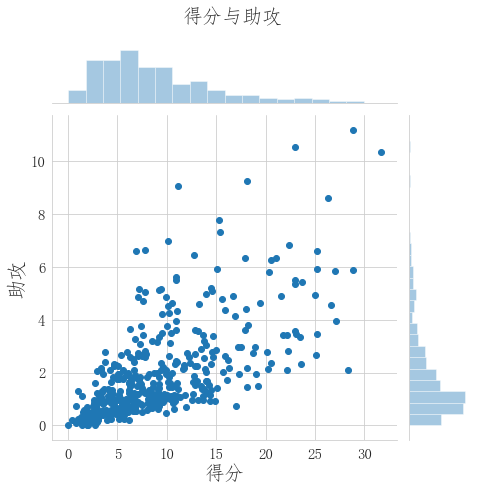

In [31]:
p = sns.jointplot('avg_pts', 'avg_ast', data=players, kind='scatter')
p.ax_joint.set_xlabel('得分')
p.ax_joint.set_ylabel('助攻')
p.ax_joint.grid()
fig = p.fig
fig.set_figheight(7)
fig.set_figwidth(7)
plt.subplots_adjust(top=0.9)
fig.suptitle('得分与助攻', fontsize=20)
plt.show()

---
<a name='3d_plot'/>

### 3D图形

由于3D图形由于观察角度等原因很容易引起对图片的误解，因此数据可视化中3D图形并不是很常见，例如`ggplot`中并不包含3D绘制

- 得分、助攻与篮板

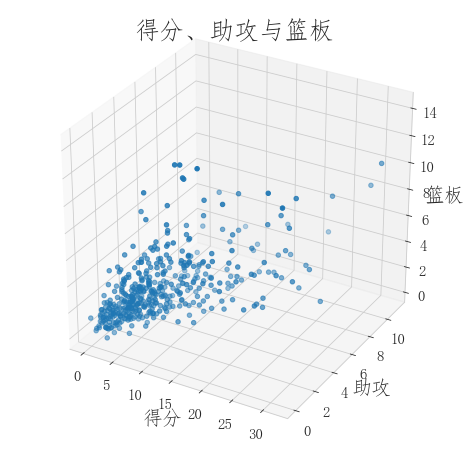

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(players['avg_pts'], players['avg_ast'], players['avg_reb'])
ax.set_xlabel('得分')
ax.set_ylabel('助攻')
ax.set_zlabel('篮板')
ax.set_title('得分、助攻与篮板')
plt.show()

---
<a name='map'/>

### 加入地图背景

这里使用`plotly`来绘制图形，`plotly`是一款非常好用的图形库，可以方便的绘制各类交互图形，`plotly`使用上一些设置较为复杂，可以参考其[官方网站](https://plot.ly/)

- 各球队球员平均得分

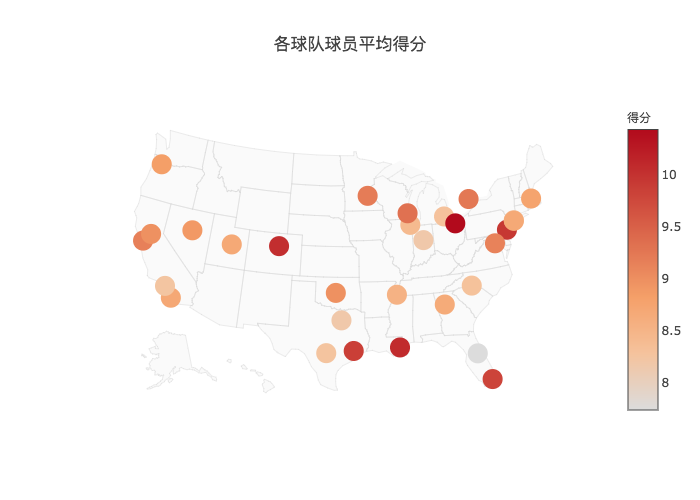

In [33]:
import plotly as ply
import plotly.io as pio
from IPython.display import Image

ply.offline.init_notebook_mode(connected=True)

team_avg_pts = players.groupby('team_name').agg({'avg_pts': 'mean'})
team_avg_pts['avg_pts'] = np.round(team_avg_pts['avg_pts'], 2)
team_avg_pts = team_avg_pts.reset_index()
team_avg_pts = pd.merge(team_avg_pts, team_info, on='team_name')
team_avg_pts['text'] = team_avg_pts['team_name'] + ': ' + team_avg_pts['avg_pts'].astype(str)

# 设置绘图数据
plot_data = [{'type': 'scattergeo', 'locationmode': 'USA-states', 
              'lon': team_avg_pts['lon'], 'lat': team_avg_pts['lat'], 
              'text': team_avg_pts['text'], 'hoverinfo': 'text', 'mode': 'markers', 
              'marker': {'size': 20, 'color': team_avg_pts['avg_pts'], 
                         'cmax': team_avg_pts['avg_pts'].max(), 
                         'cmin': team_avg_pts['avg_pts'].min(),
                         'colorbar': {'title': '得分'}}}]
# 设置版面
layout = {'title': '各球队球员平均得分', 'colorbar': True, 
          'geo': {'scope': 'usa', 'projection': {'type': 'albers usa'},
                  'showland': True, 'landcolor': 'rgb(250, 250, 250)',
                  'subunitcolor': 'rgb(217, 217, 217)', 
                  'countrycolor': 'rgb(217, 217, 217)',
                  'countrywidth': 0.5, 'subunitwidth': 0.5}}
fig = {'data': plot_data, 'layout': layout}
# 交互图
# ply.offline.iplot(fig, validate=False, show_link=False)
# 静态图
img = pio.to_image(fig, validate=False, format='png')
Image(img)

---
<a name='pca'/>

### 通过PCA可视化数据

当数据维度非常多时，利用PCA算法对数据进行降维处理，可以对其进行可视化

- 球员位置数据对比

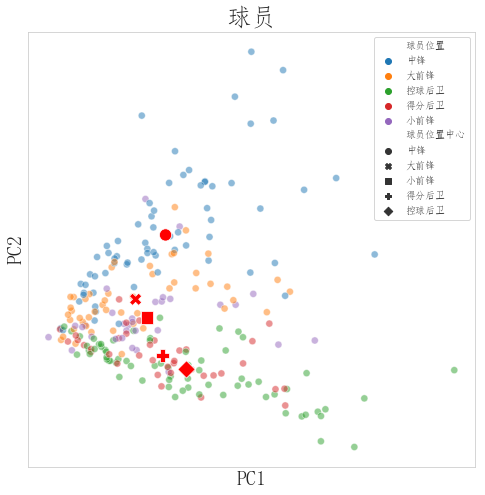

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 使用PCA算法进行降维
item_data = players.loc[:, 'avg_pts':'avg_tpm']
scaler = StandardScaler()
item_data_scaler = scaler.fit_transform(item_data)
# 取两维
pca = PCA(n_components=2)
pca_results = pca.fit_transform(item_data_scaler)
pca_df = pd.DataFrame(pca_results, columns=['PC1', 'PC2'])
pca_df['position'] = players['position']
# 只取1，2，3，4，5五个位置的球员
pca_df = pca_df[pca_df['position'].isin([1, 2, 3, 4, 5])]
pca_df.replace({'position': {1: '控球后卫', 2: '得分后卫', 3: '小前锋', 
                             4: '大前锋', 5: '中锋'}}, inplace=True)
center_pca = pca_df.groupby('position').agg({'PC1': 'mean', 'PC2': 'mean'}).reset_index()

plt.figure(figsize=(8, 8))
sns.scatterplot('PC1', 'PC2', hue='position', data=pca_df,
                s=50, alpha=0.5)
sns.scatterplot('PC1', 'PC2', style='position', color='r',
                data=center_pca, s=150)
sns.despine(right=False, top=False)
lgd = plt.legend(loc='upper right', fancybox=True, prop={'size': 10})
lgd.texts[0].set_text('球员位置')
lgd.texts[6].set_text('球员位置中心')
plt.xticks([])
plt.yticks([])
plt.title('球员')
plt.show()

---
<a name='wordcloud'></a>

### 词云图

词云图可以通过"关键字"大小、色彩等图片元素对数据进行有效的可视化

- 得分最高的50名球员

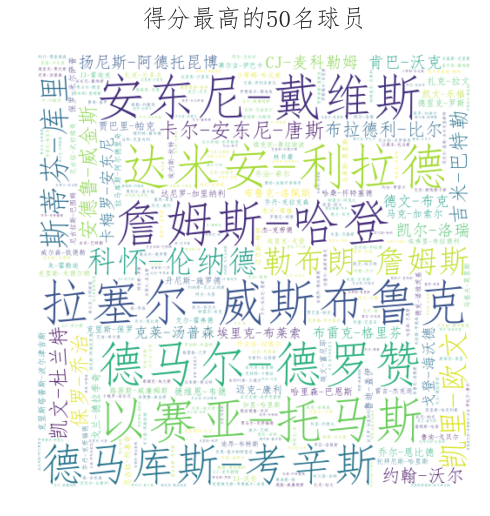

In [55]:
from wordcloud import WordCloud

# 选取得分最高的50名球员
top_pts_players = players.sort_values('avg_pts', ascending=False).loc[:50, ['player_name', 'avg_pts']]
top_pts_players_dict = {}
for record in top_pts_players.to_dict('records'):
    top_pts_players_dict[record['player_name']] = record['avg_pts']

wordcloud = WordCloud(width=500, height=500, repeat=True, background_color='white', 
                      # 设置中文字体路径
                      font_path='/Library/Fonts/Microsoft/Fangsong.ttf')
wordcloud = wordcloud.generate_from_frequencies(top_pts_players_dict)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('得分最高的50名球员', y=1.05)
plt.axis("off")
plt.show()